In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
def print_table(u, index, columns):
    pd.set_option("precision", 12)
    df = pd.DataFrame(data=u, index=index, columns=columns)
    return df

### Examen Final, Pregunta 3

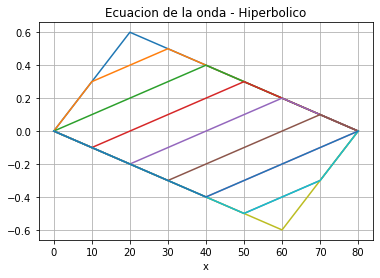

,U0j,U1j,U2j,U3j,U4j,U5j,U6j,U7j,U8j
0,0.0,0.3,0.6,0.5,0.4,0.3,0.2,0.1,0.0
1,0.0,0.3,0.4,0.5,0.4,0.3,0.2,0.1,0.0
2,0.0,0.1,0.2,0.3,0.4,0.3,0.2,0.1,0.0
3,0.0,-0.1,0.0,0.1,0.2,0.3,0.2,0.1,0.0
4,0.0,-0.1,-0.2,-0.1,0.0,0.1,0.2,0.1,0.0
5,0.0,-0.1,-0.2,-0.3,-0.2,-0.1,0.0,0.1,0.0
6,0.0,-0.1,-0.2,-0.3,-0.4,-0.3,-0.2,-0.1,0.0
7,0.0,-0.1,-0.2,-0.3,-0.4,-0.5,-0.4,-0.3,0.0
8,0.0,-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.3,0.0
9,0.0,-0.1,-0.2,-0.3,-0.4,-0.5,-0.4,-0.3,0.0


In [3]:
def uxa(t):
    return 0

def uxb(t):
    return 0

def uyc(x):
    return 0.03*x if 0 <= x <=20 else 0.01*(80 - x)

def boundary_conditions(uxa, uxb, xInterval, uyc, yInterval):
    """
    uxa: bottom boundary in xInterval
    uya, uyb: left and right boundary in yInterval
    """
    ubottom = np.empty(0)
    uleft = np.empty(0)
    uright = np.empty(0)

    for x in xInterval:
        ubottom = np.append(ubottom, uyc(x))

    for y in yInterval:
        uleft = np.append(uleft, uxa(y))
        uright = np.append(uright, uxb(y))

    return ubottom, uleft, uright


def hiperbolic(uxa, uxb, xInterval, uyc, yInterval):
    ubottom, uleft, uright = boundary_conditions(
        uxa, uxb, xInterval, uyc, yInterval)
    m = len(uleft)
    n = len(ubottom)

    u = np.zeros((m, n))

    u[0, :] = ubottom
    u[:, 0] = uleft
    u[:, -1] = uright

    # adding condition of initial partial central derivative of t
    for i in range(1, len(ubottom) - 1):
        u[1, i] = (u[0, i+1] + u[0, i-1])/2

    for j in range(1, m - 1):
        for i in range(1, n - 1):
            u[j+1, i] = u[j, i+1] + u[j, i-1] - u[j-1, i]
    return u

xa = 0
xb = 80
Δx = 10

yc = 0
yd = 100
Δy = 10

xInterval = np.arange(xa, xb + Δx, Δx)
yInterval = np.arange(yc, yd + Δy, Δy)
u = hiperbolic(uxa, uxb, xInterval, uyc, yInterval)
np.set_printoptions(precision=12, suppress=True)

for uk in u:
    plt.plot(xInterval, uk)
plt.title("Ecuacion de la onda - Hiperbolico")
plt.grid(True)
plt.xlabel("x")
plt.show()

df = pd.DataFrame(data=u, index=range(len(u[:,0])), columns=['U0j', 'U1j','U2j','U3j','U4j','U5j','U6j','U7j', 'U8j'])
df.round(3)